### Amazon Reviews - Sentiment Analysis

#### Import relevant libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
import nltk

#### Read the data

In [9]:
df = pd.read_csv ("/Amazon_Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Check for null entries

In [10]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


#### Data Pre-processing

In [11]:
df.shape

(6251, 10)

In [12]:
df= df.head(500)
df.shape

(500, 10)

#### Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

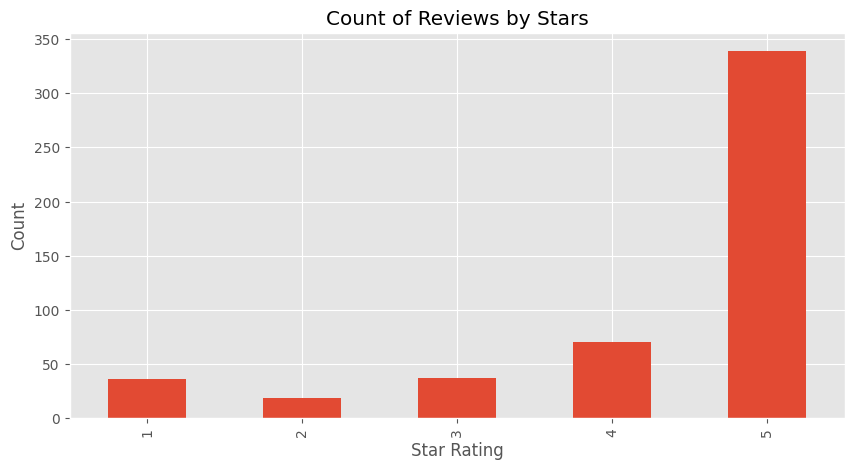

In [13]:
ax= df['Score'].value_counts().sort_index() \
      .plot(kind='bar', title = 'Count of Reviews by Stars',
            figsize =(10,5))

ax.set_xlabel ('Star Rating')
ax.set_ylabel ('Count')
plt.show

### Basic NLTK

In [14]:
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
example = df ['Text'] [49]
print (example)

This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.


#### Tokenization

In [16]:
import nltk
nltk.download('punkt_tab')
tokens= nltk.word_tokenize (example)
tokens[:10]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['This', 'is', 'the', 'same', 'stuff', 'you', 'can', 'buy', 'at', 'the']

#### POS Tagging

In [17]:
import nltk

nltk.download('averaged_perceptron_tagger_eng')

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('stuff', 'NN'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('buy', 'VB'),
 ('at', 'IN'),
 ('the', 'DT')]

#### Name Entity Recogniion

In [18]:
import nltk
from nltk import ne_chunk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
entities = ne_chunk(tagged)

entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  is/VBZ
  the/DT
  same/JJ
  stuff/NN
  you/PRP
  can/MD
  buy/VB
  at/IN
  the/DT
  big/JJ
  box/NN
  stores/NNS
  ./.
  There/EX
  is/VBZ
  nothing/NN
  healthy/JJ
  about/IN
  it/PRP
  ./.
  It/PRP
  is/VBZ
  just/RB
  carbs/JJ
  and/CC
  sugars/NNS
  ./.
  Save/VB
  your/PRP$
  money/NN
  and/CC
  get/VB
  something/NN
  that/WDT
  at/IN
  least/JJS
  has/VBZ
  some/DT
  taste/NN
  ./.)


### VADER Sentiment Scoring

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer ()

In [20]:
sia.polarity_scores ("I am very happy" )

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [21]:
sia.polarity_scores ("This is the worst food ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [22]:
sia.polarity_scores(example)

{'neg': 0.056, 'neu': 0.865, 'pos': 0.079, 'compound': 0.2363}

#### Run Polarity score on entire data set

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total = len (df)):
    text= row ['Text']
    myid= row ['Id']
    res [myid]= sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
vaders= pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns ={'index':'Id'})
vaders=vaders.merge(df, how='left')

In [25]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plot VADER results

Text(0.5, 1.0, 'Compound Scores for Amazon Reviews')

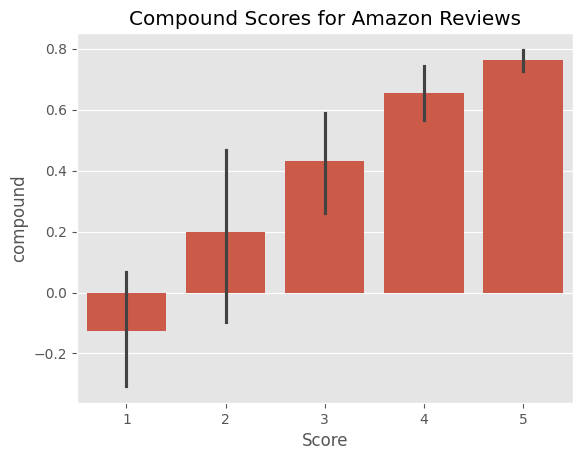

In [26]:
ax= sns.barplot(data=vaders, x= 'Score', y='compound')
ax.set_title ('Compound Scores for Amazon Reviews')

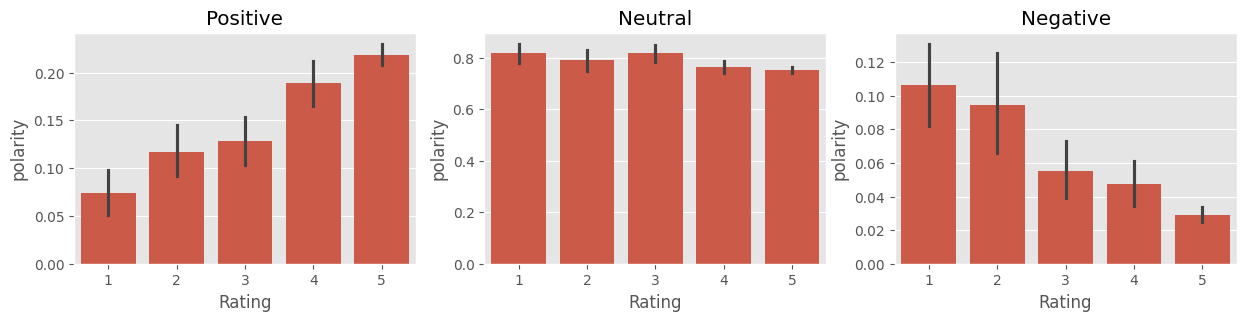

In [27]:
fig, axs = plt.subplots (1,3 ,figsize=(15,3))
sns.barplot(data=vaders, x= 'Score', y='pos', ax=axs [0])
sns.barplot(data=vaders, x= 'Score', y='neu', ax=axs [1])
sns.barplot(data=vaders, x= 'Score', y='neg', ax=axs [2])
axs[0].set_title ('Positive')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('polarity')

axs[1].set_title ('Neutral')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('polarity')

axs[2].set_title ('Negative')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('polarity')

plt.show()

### Roberta Pretrained Model

##### Install relevant modules

In [28]:
!pip install torch
!pip install tensorflow
!pip install flax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install numpy==1.26.4 --quiet
import os
os.kill(os.getpid(), 9)
!pip install --upgrade tensorflow-intel
!pip install ml-dtypes==0.2.0

ERROR: Operation cancelled by user


In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

##### Initialize model

In [2]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


#### VADER results on example

In [ ]:
example = df ['Text'] [49]
print (example)
sia.polarity_scores (example )

#### Run for Roberta model

In [ ]:
encoded_text = tokenizer (example, return_tensors= 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores [0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
}
print (scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer (example, return_tensors= 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores [0],
        'roberta_neu' : scores [1],
        'roberta_pos' : scores [2]
    }
    return (scores_dict)

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len (df)):
    try:
        text= row ['Text']
        myid= row ['Id']
        vader_result= sia.polarity_scores(text)
        vader_result_rename = {}
        for key , value in vader_result.items():
            vader_result_rename [f"vader_{key}"]= value
        roberta_result = polarity_scores_roberta(text)
        both= {**vader_result_rename,**roberta_result}
        res[myid]=both
    except RuntimeError :
        print(f'Broke for id {myid}')

In [ ]:
both

In [ ]:
results_df= pd.DataFrame(res).T
results_df= results_df.reset_index().rename(columns ={'index':'Id'})
results_df=results_df.merge(df, how='left')
results_df.head()

### Compare Scores Between Models

In [ ]:
results_df.columns


In [ ]:
sns.pairplot (data = results_df, vars= ['vader_neg', 'vader_neu', 'vader_pos',
                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
                    hue= 'Score', palette = 'tab10')
plt.show()

### Review Examples

In [ ]:
results_df.query('Score == 1').sort_values ('roberta_pos', ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1').sort_values ('vader_pos', ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5').sort_values ('roberta_neg', ascending = False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5').sort_values ('vader_neg', ascending = False)['Text'].values[0]

### The Transformers Pipeline

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline ("sentiment-analysis")

In [ ]:
sent_pipeline ('I hate people pleasing' )

In [ ]:
sent_pipeline ('I love dogs' )

In [ ]:
sent_pipeline ('Subscribe to my channel' )